# Car Bounding Box Detection

# Import required libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import shutil
import datetime
import pytz

%matplotlib inline

# Define directory paths

In [3]:
dataset_path = os.path.normpath(r'E:\Sync_With_NAS_Ext\Datasets\Image_Datasets\Stanford_Car_Dataset')

# Load train annotation file into a dataframe

In [52]:
ann_train_csv_path = os.path.join(dataset_path, 'anno_train.csv')
df_cols = ['filename', 'xmin', 'xmax', 'ymin', 'ymax', 'label']
ann_train_df = pd.read_csv(ann_train_csv_path, header = None, names = df_cols, index_col = False)
ann_train_df.head()

,filename,xmin,xmax,ymin,ymax,label
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


# Load class names and create label:class dictionary mapping

In [42]:
classes_path = os.path.join(dataset_path, 'names.csv')
classes = pd.read_csv(classes_path, header = None, names = ['class'])
display(classes.head())

label_class_dict = {}
for row in classes.iterrows():
    label_class_dict[row[0] + 1] = row[1]['class']

,class
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


# Add class names to train annotation df

In [61]:
for ind, row in ann_train_df.iterrows():
    ann_train_df.loc[ind, 'class'] = label_class_dict[row['label']]

ann_train_df.head()

,filename,xmin,xmax,ymin,ymax,label,class
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012
2,00003.jpg,85,109,601,381,91,Dodge Dakota Club Cab 2007
3,00004.jpg,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012
4,00005.jpg,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012


In [60]:
ann_train_df.head(10)

,filename,xmin,xmax,ymin,ymax,label,class
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012
2,00003.jpg,85,109,601,381,91,Dodge Dakota Club Cab 2007
3,00004.jpg,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012
4,00005.jpg,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012
5,00006.jpg,259,289,515,416,123,Geo Metro Convertible 1993
6,00007.jpg,88,80,541,397,89,Dodge Journey SUV 2012
7,00008.jpg,73,79,591,410,96,Dodge Charger Sedan 2012
8,00009.jpg,20,126,1269,771,167,Mitsubishi Lancer Sedan 2012
9,00010.jpg,21,110,623,367,58,Chevrolet Traverse SUV 2012


# Copy all training set image files into one directory

In [78]:
train_img_root_path = os.path.join(dataset_path, 'car_data/car_data/train')
train_img_dest_path = os.path.join(dataset_path, 'train_images')
for folder in os.listdir(train_img_root_path):
    curr_path = os.path.join(train_img_root_path, folder)
    for file in os.listdir(curr_path):
        file_path = os.path.join(curr_path, file)
        shutil.copy(file_path, train_img_dest_path)    

# Play with simpler version

In [80]:
dataset_path = os.path.normpath(r'E:\Sync_With_NAS_Ext\Datasets\Image_Datasets\Stanford_Car_Dataset\Temp_Dataset')

In [81]:
ann_train_csv_path = os.path.join(dataset_path, 'anno_train.csv')
df_cols = ['filename', 'xmin', 'xmax', 'ymin', 'ymax', 'label']
ann_train_df = pd.read_csv(ann_train_csv_path, header = None, names = df_cols, index_col = False)
ann_train_df.head()

,filename,xmin,xmax,ymin,ymax,label
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [83]:
for ind, row in ann_train_df.iterrows():
    ann_train_df.loc[ind, 'class'] = label_class_dict[row['label']]

ann_train_df.head()

,filename,xmin,xmax,ymin,ymax,label,class
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012
2,00003.jpg,85,109,601,381,91,Dodge Dakota Club Cab 2007
3,00004.jpg,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012
4,00005.jpg,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012


In [84]:
ann_train_df.to_csv('ann_train.csv', index = False)

In [87]:
train_img_path = os.path.join(dataset_path, 'train_img')

In [92]:
start_time = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))
print("Started train.tfrecord creation at %s" %(start_time.strftime("%H:%M:%S")), end = '; ')

!python generate_tfrecord.py --csv_input=ann_train.csv --img_path={train_img_path} --output_path=train.tfrecord

end_time = datetime.datetime.now(pytz.timezone('Asia/Kolkata'))
elap_time = ((end_time - start_time).total_seconds())/60
print("Completed at %s. Elapsed time = %0.2f minutes." %(end_time.strftime("%H:%M:%S"), elap_time)) 

Started train.tfrecord creation at 16:03:21; Successfully created the TFRecords: C:\User_Directories\Sync_With_NAS\Users\suresh\work\AIMLDL\GitHub_Repositories\Deep_Learning\Computer_Vision\Projects\Car_BBOX_Detection\train.tfrecord
Completed at 16:03:28. Elapsed time = 0.11 minutes.


2021-04-30 16:03:22.621395: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-04-30 16:03:22.621433: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Backup

In [8]:
img_path = os.path.join(dataset_path, 'Car_data/car_data/train/Audi TTS Coupe 2012/00001.jpg')


'E:\\Sync_With_NAS_Ext\\Datasets\\Image_Datasets\\Stanford_Car_Dataset\\Car_data/car_data/train/Audi TTS Coupe 2012/00001.jpg'

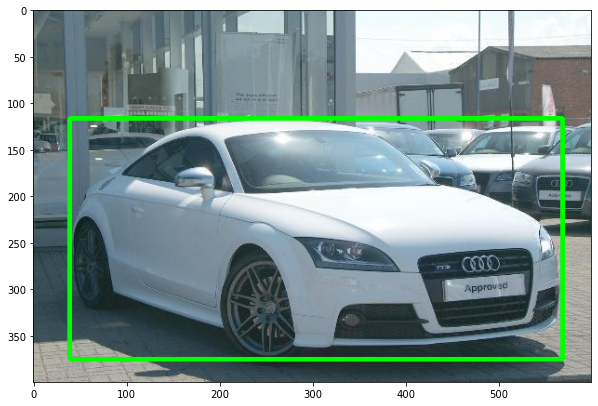

In [18]:
img = cv2.imread(img_path)
xmin = ann_train_df.iloc[0, 1]
ymin = ann_train_df.iloc[0, 2]
xmax = ann_train_df.iloc[0, 3]
ymax = ann_train_df.iloc[0, 4]
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), color = (0, 255, 0), thickness = 4)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10, 10))
plt.imshow(img_rgb);
